In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from function.water_data import Water
from function.add_dam import Add_Dam

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:

wa=Water()
ad=Add_Dam()

In [ ]:
# 수질 데이터 로드
waterDF = wa.api_data()
damDF = wa.dam()
waterDF.columns

--- 분석 준비 완료: 핵심 수질 지표 ---
  총량지점명         일자   수온  수소이온농도(ph)  전기전도도(EC)  용존산소(DO)  BOD  COD  부유물질  \
0    물금 2021-01-04  4.6         7.5      437.0      13.1  1.7  5.1   2.4   
1    물금 2021-01-11  2.8         7.3      461.0      14.3  2.0  5.4   4.0   
2    물금 2021-01-26  5.1         7.2      470.0      15.6  2.1  6.0   7.6   
3    물금 2021-01-18  3.1         7.3      463.0      15.2  2.2  5.9   6.4   
4    물금 2021-02-16  6.6         8.4      451.0      12.1  2.8  6.6  12.4   

   총질소(T-N)  총인(T-P)  총유기탄소(TOC)      유량  클로로필-a  
0     3.223    0.025         3.8  29.555    12.4  
1     3.268    0.031         4.0  28.599    19.4  
2     3.416    0.026         4.6  74.897    47.3  
3     3.327    0.032         4.4  47.190    33.2  
4     3.489    0.027         5.0  72.735    50.4  
하굿둑 데이터 확보 성공: 240건


Index(['총량지점명', '일자', '수온', '수소이온농도(ph)', '전기전도도(EC)', '용존산소(DO)', 'BOD',
       'COD', '부유물질', '총질소(T-N)', '총인(T-P)', '총유기탄소(TOC)', '유량', '클로로필-a'],
      dtype='object')

In [ ]:
waterDF.describe().T

,count,mean,min,25%,50%,75%,max,std
일자,406,2023-05-14 23:31:37.536945920,2021-01-04 00:00:00,2022-03-08 00:00:00,2023-05-09 00:00:00,2024-07-16 06:00:00,2025-10-27 00:00:00,NaN
수온,404.0,18.056188,2.8,10.675,19.0,25.225,32.0,8.431139
수소이온농도(ph),404.0,7.912376,6.5,7.6,7.9,8.3,9.2,0.536458
전기전도도(EC),404.0,297.460396,118.0,206.5,279.5,388.0,516.0,107.355447
용존산소(DO),404.0,10.37203,6.6,8.4,9.6,11.925,16.0,2.407574
BOD,404.0,1.876485,0.4,1.3,1.75,2.3,4.4,0.723801
COD,404.0,5.998515,4.2,5.2,5.9,6.6,11.6,1.082983
부유물질,404.0,7.247277,0.4,3.6,6.0,8.8,100.8,7.381532
총질소(T-N),404.0,2.449906,0.804,2.04225,2.4205,2.91025,3.8,0.618431
총인(T-P),404.0,0.042918,0.015,0.027,0.0335,0.049,0.281,0.026786


In [ ]:
# 물금과 금곡 지점 데이터 분리
mulgeum_df = waterDF[waterDF['총량지점명'] == '물금'].copy().set_index('일자').dropna()
geumgok_df = waterDF[waterDF['총량지점명'] == '금곡'].copy().set_index('일자').dropna()

물금 유량 대비 금곡 유량이 일정 비율 이하로 떨어질 때, 즉 두 지점 사이의 체류시간이 일정 이상일때 클로로필a농도가 상승할 것이다. 귀무 가설

결론, 두 지점 사이의 유량 차이를 일정 이상 유지하는게 좋을 수 도 있다.


In [ ]:
# 유량 차이 및 증폭도 분석
c_df = pd.DataFrame()
c_df['유량차이'] = geumgok_df['유량'] - mulgeum_df['유량']
c_df['물금'] = mulgeum_df['클로로필-a']
c_df['금곡'] = geumgok_df['클로로필-a']
c_df['증폭도'] = geumgok_df['클로로필-a'] / mulgeum_df['클로로필-a']
c_df.dropna(inplace=True)
c_df.describe()

,유량차이,물금,금곡,증폭도
count,177.000000,177.000000,177.000000,177.000000
mean,5.280836,22.651977,21.255932,1.065813
std,23.562030,17.097960,15.439901,0.534889
min,0.000000,1.100000,1.700000,0.279570
25%,0.570000,9.100000,9.300000,0.734082
50%,1.041000,17.900000,18.800000,0.960000
75%,3.312000,33.200000,28.000000,1.277778
max,222.636000,95.500000,72.800000,4.057692


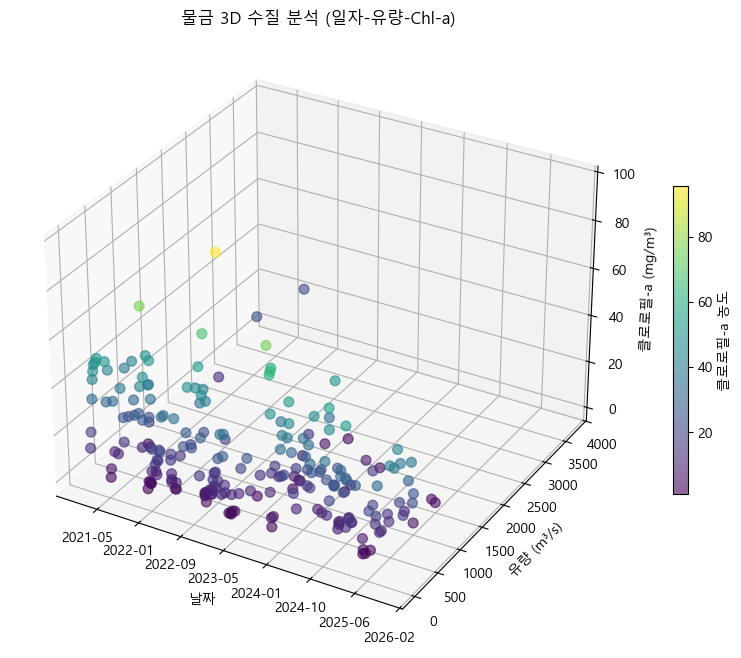

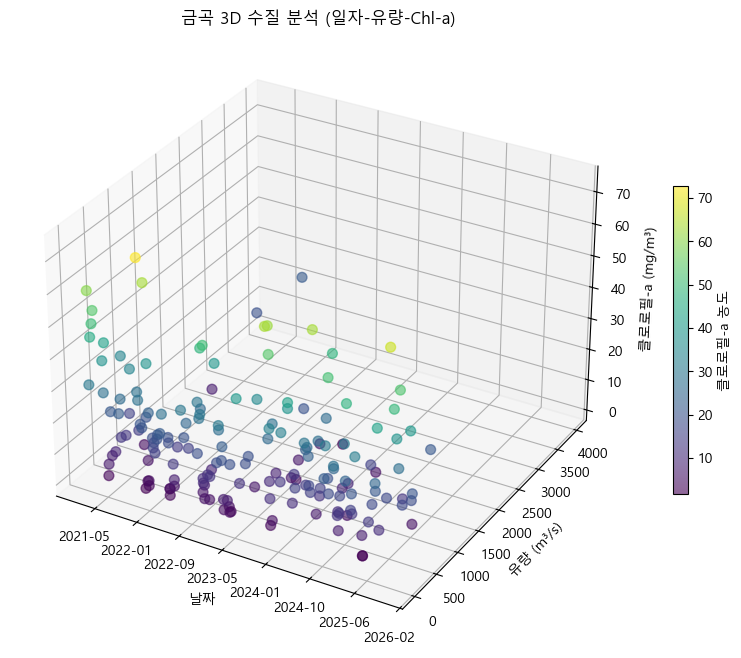

In [ ]:
def draw_3d_algae_plot(df, title):
    """3D 수질 분석 그래프 그리기"""
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 데이터 준비
    x = mdates.date2num(df.index)
    y = df['유량']
    z = df['클로로필-a']
    
    # 3D 산점도 그리기
    scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50, alpha=0.6)
    
    # 축 설정
    ax.set_title(f'{title} 3D 수질 분석 (일자-유량-Chl-a)')
    ax.set_xlabel('날짜')
    ax.set_ylabel('유량 (m³/s)')
    ax.set_zlabel('클로로필-a (mg/m³)')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    # 컬러바 추가
    fig.colorbar(scatter, ax=ax, label='클로로필-a 농도', shrink=0.5)
    plt.show()

# 물금과 금곡 3D 시각화
draw_3d_algae_plot(mulgeum_df, "물금")
draw_3d_algae_plot(geumgok_df, "금곡")


In [ ]:
# 금곡 지점 월별 데이터 집계
mulgeum_df = ad.month_dam_add(mulgeum_df, damDF).set_index('일자')
geumgok_df = ad.month_dam_add(geumgok_df, damDF).set_index('일자')

In [ ]:
mulgeum_df

,수온,수소이온농도(ph),전기전도도(EC),용존산소(DO),BOD,COD,총질소(T-N),유량,총유기탄소(TOC),총인(T-P),부유물질,하굿둑방류량_평균,하굿둑강수량_평균,클로로필-a
일자,,,,,,,,,,,,,,
2021-01-01,3.900000,7.325000,457.750000,14.550000,2.000000,5.600000,3.308500,45.060250,4.200000,0.028500,5.100,7.190323,0.367742,28.075000
2021-02-01,5.875000,8.000000,451.500000,13.800000,2.450000,6.225000,3.393500,35.312250,4.675000,0.030750,8.500,5.207143,0.632143,47.025000
2021-03-01,11.050000,8.100000,397.250000,12.400000,2.750000,6.400000,3.485000,251.268250,4.600000,0.094000,9.200,18.125806,3.332258,40.700000
2021-04-01,16.975000,8.025000,300.000000,10.600000,2.100000,5.625000,2.848000,243.602000,3.825000,0.037000,5.500,24.313333,1.723333,21.525000
2021-05-01,20.025000,7.725000,281.000000,8.675000,1.375000,5.475000,2.468000,291.149000,3.300000,0.033000,3.000,20.041935,3.558065,8.825000
2021-06-01,25.900000,8.475000,287.000000,9.225000,2.300000,6.675000,1.933250,246.631250,4.450000,0.025000,5.500,19.740000,2.150000,30.050000
2021-07-01,28.000000,7.475000,166.000000,7.850000,2.325000,7.925000,2.087750,1382.219000,4.850000,0.072250,27.200,81.761290,8.132258,18.300000
2021-08-01,28.650000,8.075000,202.250000,8.000000,2.000000,7.500000,1.747500,1243.763250,4.425000,0.057750,30.600,77.148387,9.167742,29.650000
2021-09-01,23.925000,8.000000,205.750000,8.975000,1.400000,6.575000,2.307000,327.825000,4.800000,0.052500,10.500,46.433333,4.023333,29.325000


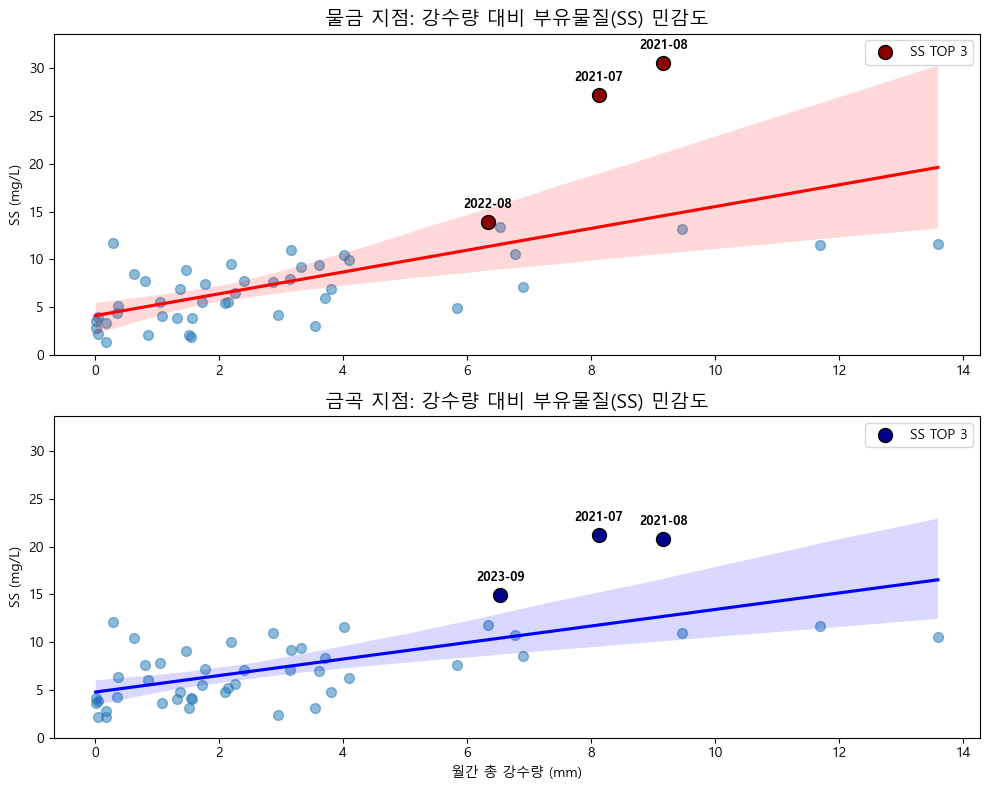

In [ ]:
def plot_precipitation_vs_suspended_solids(mulgeum_data, geumgok_data):
    """강수량 대비 부유물질(SS) 시각화"""
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    
    # Y축 범위 설정 (두 지점 중 최대값 기준)
    max_ss = max(mulgeum_data['부유물질'].max(), geumgok_data['부유물질'].max()) * 1.1
    
    # 물금 지점 (상단)
    sb.regplot(data=mulgeum_data, x='하굿둑강수량_평균', y='부유물질', 
               scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'}, ax=axes[0])
    
    top3_m = mulgeum_data.nlargest(3, '부유물질')
    axes[0].scatter(top3_m['하굿둑강수량_평균'], top3_m['부유물질'], 
                   color='darkred', s=100, edgecolors='black', zorder=5, label='SS TOP 3')

    for idx, row in top3_m.iterrows():
        axes[0].annotate(idx.strftime('%Y-%m'), 
                        (row['하굿둑강수량_평균'], row['부유물질']),
                        textcoords="offset points", xytext=(0, 10), 
                        ha='center', fontsize=9, fontweight='bold')
    
    axes[0].set_title('물금 지점: 강수량 대비 부유물질(SS) 민감도', fontsize=14)
    axes[0].set_ylim(0, max_ss)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('SS (mg/L)')
    axes[0].legend()
    
    # 금곡 지점 (하단)
    sb.regplot(data=geumgok_data, x='하굿둑강수량_평균', y='부유물질',
               scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'blue'}, ax=axes[1])
    
    top3_g = geumgok_data.nlargest(3, '부유물질')
    axes[1].scatter(top3_g['하굿둑강수량_평균'], top3_g['부유물질'],
                   color='darkblue', s=100, edgecolors='black', zorder=5, label='SS TOP 3')
    
    for idx, row in top3_g.iterrows():
        axes[1].annotate(idx.strftime('%Y-%m'), 
                        (row['하굿둑강수량_평균'], row['부유물질']),
                        textcoords="offset points", xytext=(0, 10), 
                        ha='center', fontsize=9, fontweight='bold')
    
    axes[1].set_title('금곡 지점: 강수량 대비 부유물질(SS) 민감도', fontsize=14)
    axes[1].set_ylim(0, max_ss)
    axes[1].set_xlabel('월간 총 강수량 (mm)')
    axes[1].set_ylabel('SS (mg/L)')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

plot_precipitation_vs_suspended_solids(mulgeum_df, geumgok_df)

강수량 VS 부유물질

In [ ]:
# 상관관계 분석
correlation_columns = ['부유물질', '총인(T-P)', '클로로필-a']

print('물금')
mulgeum_corr = mulgeum_df[correlation_columns].corr()
print(mulgeum_corr, '\n')

print('금곡')
geumgok_corr = geumgok_df[correlation_columns].corr()
print(geumgok_corr)


물금
             부유물질   총인(T-P)    클로로필-a
부유물질     1.000000  0.579161  0.315558
총인(T-P)  0.579161  1.000000  0.031217
클로로필-a   0.315558  0.031217  1.000000 

금곡
             부유물질   총인(T-P)    클로로필-a
부유물질     1.000000  0.690435  0.351675
총인(T-P)  0.690435  1.000000 -0.092102
클로로필-a   0.351675 -0.092102  1.000000


월간 오염 부하량

녹조가 적어지기 위해서 어떤쪽을 좀 더 집중해서 보안해야 할까?
귀무가설: 녹조가 적어지기 위해서는 비점오염에 대해서 대비하는게 좀 더 효율적이다.

1. 오염원의 정체: "비점오염(빗물 유출)"

결론: 상관계수가 0.58이라는 것은 물속의 인(T-P) 중 절반 이상이 흙탕물(SS)에 달라붙어 함께 유입

인사이트: 하수처리장에서 나오는 물(점오염)은 대개 맑기 때문에 SS가 낮고 T-P만 높습니다. 

반면, 논·밭이나 도로에서 씻겨 내려오는 빗물은 SS와 T-P가 동시에 높습니다.

결론: 부산 취수원(물금/금곡)의 인 농도를 결정하는 핵심 요인은 하수처리장보다는 **"비가 올 때 상류 지표면에서 씻겨 내려오는 토사와 가축 분뇨"**임을 데이터가 증명하고 있습니다.

2021년 7월 8월은 기온이 높고 강수량이 적음, 무더위가 심해서 장마의 시작이 미루졌음

In [ ]:
mulgeum_df = waterDF[waterDF['총량지점명'] == '물금'].copy().set_index('일자').dropna()
geumgok_df = waterDF[waterDF['총량지점명'] == '금곡'].copy().set_index('일자').dropna()

In [ ]:
mulgeum_df.sort_index(inplace=True)

In [ ]:
def heat(df):
    # 1. 상관계수 행렬 계산/기본 상관관계
    corr_matrix = df.corr(numeric_only=True)

    # 2. '클로로필-a'와 다른 요소들 간의 상관관계만 추출 (정렬 포함)
    chl_corr = corr_matrix[['클로로필-a']].sort_values(by='클로로필-a', ascending=False)

    # 3. 히트맵 시각화
    plt.figure(figsize=(6, 10))
    sb.heatmap(chl_corr, annot=True, cmap='RdYlGn', fmt=".2f", cbar=True)
    plt.title('클로로필-a 상관관계 히트맵')
    plt.show()

In [ ]:
mulgeum_df['유량_7일차']=mulgeum_df['유량'].shift(1)

In [ ]:
mulgeum_df['수온_7일차']=mulgeum_df['수온'].shift(1)

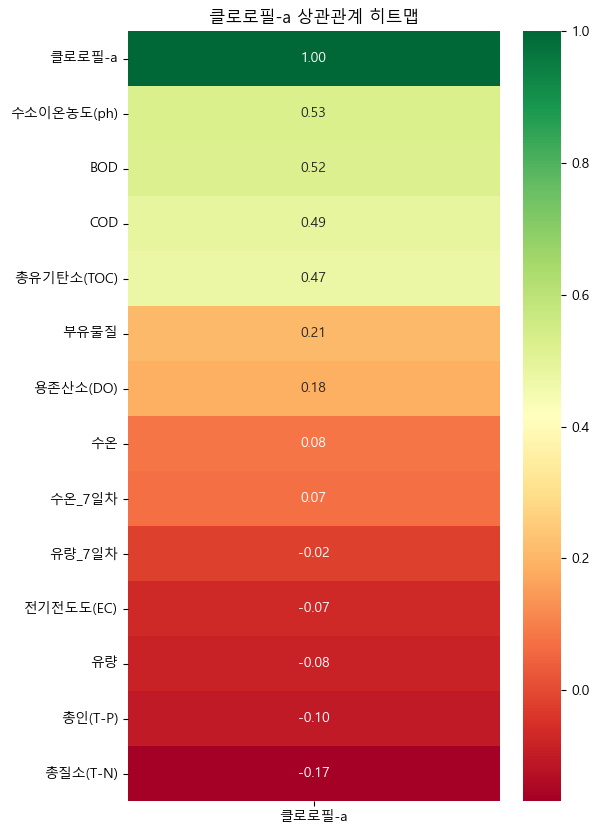

In [ ]:
heat(mulgeum_df.dropna())